In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.model_selection import train_test_split
# 本代码是能够实现n阶函数拟合数据，优化函数为minibatch SGD

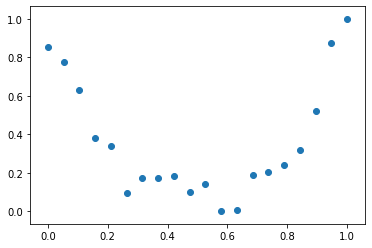

In [15]:
#产生数据集
n_dots = 20 #总数据量

x = np.linspace(-1, 1, n_dots)
y = x*x + 0.3*np.random.rand(n_dots);

# 数据归一化
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0,len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)

#划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
#绘制训练数据集
plt.scatter(x,y)

In [16]:
#n次函数拟合数据 y=para_1*x**n+para_2*x**(n-1)+...+para_n*x+para_(n+1)
#n次函数
def fun(x,n,para):
    y=0
    for i in range(0 , n+1):
        y = para[i]*x**(n-i)+ y #y=para_1*x**n+para_2*x**(n-1)+...+para_n*x+para_(n+1)
    return y
#函数对para求导
def dfn(y,y_pred,x,n):
    df = [0]*(n+1)
    for i in range(0, n+1):
        df[i] = (y-y_pred)*(-x**(n-i))
    return df
#计算损失
def calc_loss(y,y_p):
    tmp = y_p-y
    tmp = tmp ** 2  
    SSE = sum(tmp) / (2 * len(y))
    return SSE

In [17]:
#打乱数据集
def shuffle_data(x,y):
    # 随机打乱x，y的数据，并且保持x和y一一对应
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)
#获得批量数据
def get_batch_data(x,y,batch):
    shuffle_data(x,y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new,y_new]

step: 100 loss: 0.053067489902813916


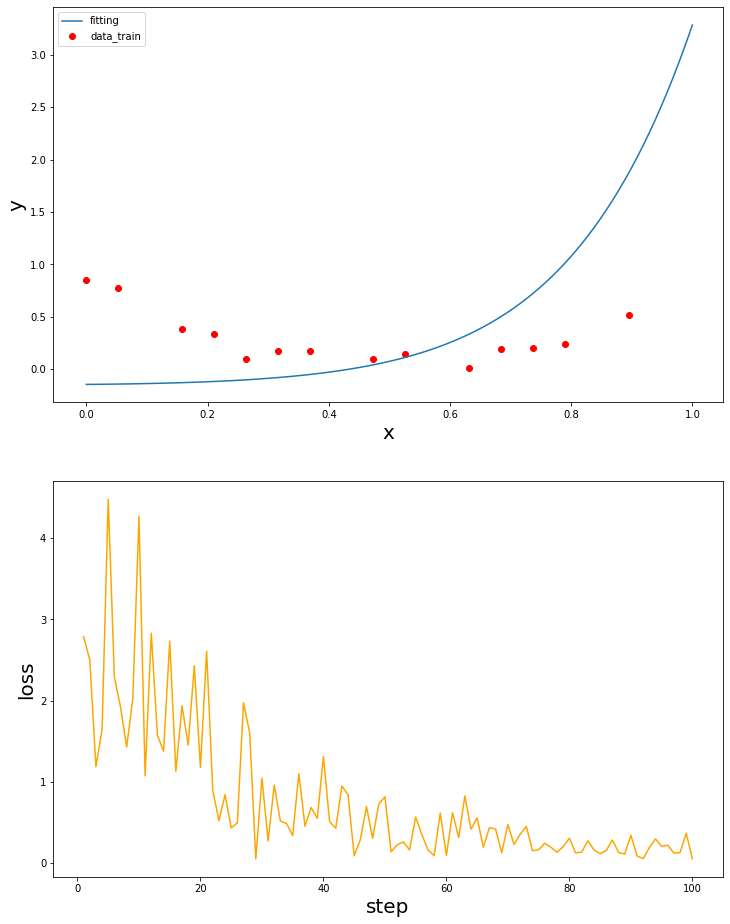

step: 10000 loss: 0.003499821133504386
step: 20000 loss: 0.004502583025537477
step: 30000 loss: 0.006713352871292548
step: 40000 loss: 0.0035467823157971285
step: 50000 loss: 0.0019568014994224216
step: 60000 loss: 0.004831234199563458
step: 70000 loss: 0.002228474681931682
step: 80000 loss: 0.005085947595464702
step: 90000 loss: 0.0018167817523177475
step: 100000 loss: 0.005670125216857675
step: 110000 loss: 0.004626125239871086
step: 120000 loss: 0.004752343480254127
step: 130000 loss: 0.003542116376214702
step: 140000 loss: 0.004241002390832227
step: 150000 loss: 0.004327369349306644
step: 160000 loss: 0.003592612822368335
step: 170000 loss: 0.002792345466513301
step: 180000 loss: 0.0015035579091147386
step: 190000 loss: 0.0018523350462013722
step: 200000 loss: 0.0006681042388032354
step: 210000 loss: 0.002023410251490057
step: 220000 loss: 0.003323644632633254
step: 230000 loss: 0.0016478177672744512
step: 240000 loss: 0.0012181499857934137
step: 250000 loss: 0.0038934628028608705


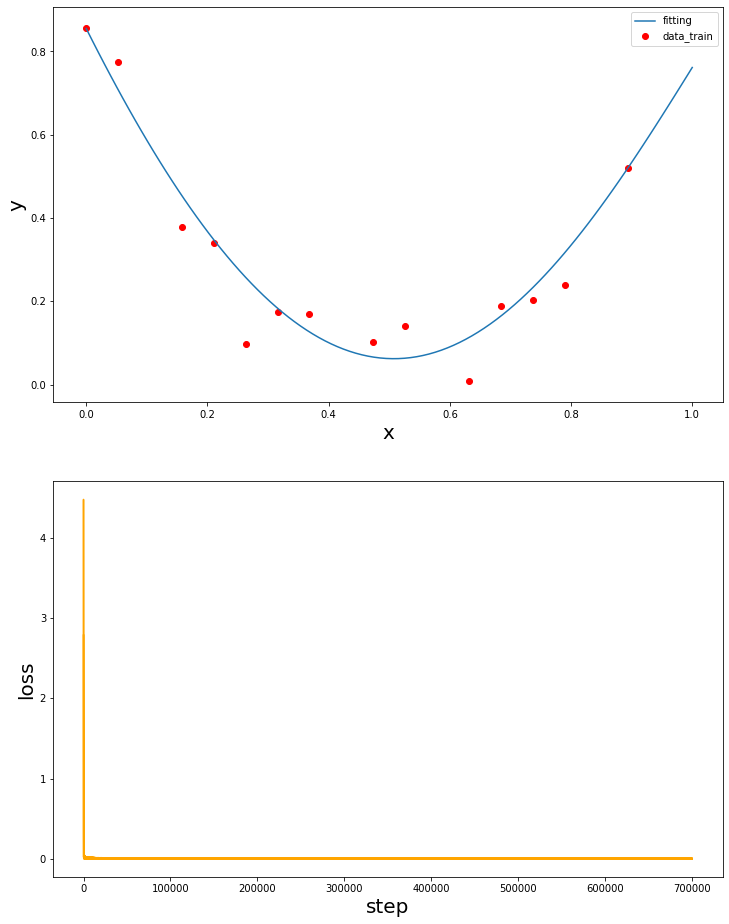

step: 700000 loss: 0.004229888579216726
step: 710000 loss: 0.0032977390106098117
step: 720000 loss: 0.0011319811779505113
step: 730000 loss: 0.0007645786849221412
step: 740000 loss: 0.0006238579366219049
step: 750000 loss: 0.002796251595788692
step: 760000 loss: 0.001108166820884814
step: 770000 loss: 0.0017451290510616523
step: 780000 loss: 0.0032971780634674036
step: 790000 loss: 0.0038101337489658536
函数阶数为 7 函数系数为： [ 0.12491178 -0.19952688 -0.34415431 -0.02373062  1.07049017  2.22257283
 -2.9478666   0.843615  ]


In [26]:
# 初始化a,b值
#使用n阶函数拟合
n = 7 #7阶函数，很奇怪，用7阶还是没有过拟合，感觉是代码可能存在问题
para = [1]*(n+1) #初始化n阶函数系数为1
#开始训练
rate = 0.1 # learning rate

all_loss = []
all_step = []

last_para = para

for step in range(1,800000):
    loss = 0
    #选批量数据
    shuffle_data(x_train,y_train)
    [x_new,y_new] = get_batch_data(x_train,y_train,5)
    all_df = [0]*(n+1)
    #计算loss
    for i in range(0,len(x_new)):
        y_p = fun(x_new[i],n,para)
        loss = loss + (y_new[i] - y_p)*(y_new[i] - y_p)/2
        df = np.array(dfn(y_new[i],y_p,x_new[i],n))
        df = np.array(all_df) + np.array(df)
    df = df/len(x_new)  
    loss = loss/len(x_new)
    
    all_loss.append(loss)
    all_step.append(step)
    if step == 100 or step ==700000:
        fig = plt.figure(1, figsize=(12, 16))

        # 绘制回归直线
        plt.subplot(2, 1, 1)
        plt.scatter(x_train, y_train,c="red",label ="data_train")
        x_ = np.linspace(0, 1, 100)
        y_draw = fun(x_,n,para)
        plt.plot(x_, y_draw,label = "fitting")
        plt.legend()
        plt.xlabel("x",fontsize=20)
        plt.ylabel("y",fontsize=20)

        # 绘制loss更新曲线
        plt.subplot(2,1,2)
        plt.plot(all_step,all_loss,color='orange')
        plt.xlabel("step",fontsize=20)
        plt.ylabel("loss",fontsize=20)
        
        print("step:",step,"loss:",loss)
        plt.show()
        plt.pause(0.01)

    #更新系数值
    last_para = para 
    para = np.array(para) - np.array(rate*df)
    
    if step%10000 ==0:
        print("step:",step,"loss:",loss)
        
    if step == 100:
        rate = rate/2
        
print("函数阶数为",n,"函数系数为：",last_para)

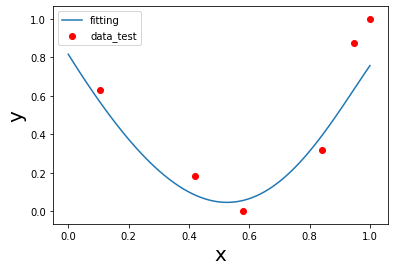

In [24]:
#使用训练模型对测试集进行预测
# 绘制测试集数据与预测模型直线
plt.scatter(x_test, y_test,c="red",label ="data_test")
x_ = np.linspace(0, 1, 100)
y_draw = fun(x_,n,para)
plt.plot(x_, y_draw,label = "fitting")
plt.legend()
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

In [25]:
#计算测试集下loss
y_test_pred = fun(x_test,n,para)
test_loss = calc_loss(y_test,y_test_pred)
print("训练集loss为：",test_loss)

训练集loss为： 0.01160083697893178
